In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**Avertissement :** Si vous avez utilisé la fonction `std()` de Pandas pour calculer l'écart type, gardez à l'esprit qu'elle utilise une correction de biais par défaut. 

La formule pour l'écart type sans biais est la suivante :

$$
\sigma = \sqrt{\frac{\sum_{i=1}^{N}(x_i - \bar{x})^2}{N-1}}
$$


### Exemple:
![](images/1.png)


### Etape 0: importer les données

In [5]:
data=pd.read_excel('example_1.xlsx',index_col='eleve')
data ## assuer que les donnes buen charger

,Poids,Taille,Age,Note
eleve,,,,
1,45,1.50,13,14
2,50,1.60,13,16
3,50,1.65,13,15
4,60,1.75,15,9
5,60,1.70,14,10
6,60,1.70,14,7
7,70,1.60,14,8
8,65,1.60,13,13
9,60,1.55,15,17


### Etape 1: Centrer et réduire les données

In [43]:
means = np.mean(data, axis=0)
ecart_types = np.std(data, axis=0)

df_standardized = (data - means) / ecart_types
print(pd.DataFrame({'moyenne':means,'écart-type':ecart_types}).T)
##Notre nouvelle matrice de données centrées réduites est la suivante:
print('\nNotre nouvelle matrice de données centrées réduites est la suivante:')
df_standardized

                Poids   Taille        Age       Note
moyenne     58.500000  1.63500  13.800000  12.000000
écart-type   7.433034  0.07433   0.748331   3.316625

Notre nouvelle matrice de données centrées réduites est la suivante:


,Poids,Taille,Age,Note
eleve,,,,
1,-1.816217,-1.816217,-1.069045,0.603023
2,-1.143544,-0.470871,-1.069045,1.206045
3,-1.143544,0.201802,-1.069045,0.904534
4,0.201802,1.547147,1.603567,-0.904534
5,0.201802,0.874475,0.267261,-0.603023
6,0.201802,0.874475,0.267261,-1.507557
7,1.547147,-0.470871,0.267261,-1.206045
8,0.874475,-0.470871,-1.069045,0.301511
9,0.201802,-1.143544,1.603567,1.507557


### Etape 2: La matrice de corrélation des variables, est la suivante:

In [44]:
Xtelda=df_standardized.values #ectract les values de data fran dans une matrix
Xtelda

array([[-1.81621654, -1.81621654, -1.06904497,  0.60302269],
       [-1.14354375, -0.47087096, -1.06904497,  1.20604538],
       [-1.14354375,  0.20180184, -1.06904497,  0.90453403],
       [ 0.20180184,  1.54714743,  1.60356745, -0.90453403],
       [ 0.20180184,  0.87447463,  0.26726124, -0.60302269],
       [ 0.20180184,  0.87447463,  0.26726124, -1.50755672],
       [ 1.54714743, -0.47087096,  0.26726124, -1.20604538],
       [ 0.87447463, -0.47087096, -1.06904497,  0.30151134],
       [ 0.20180184, -1.14354375,  1.60356745,  1.50755672],
       [ 0.87447463,  0.87447463,  0.26726124, -0.30151134]])

In [8]:
nomber_observation=Xtelda.shape[0] ## le nomber des obsirvation est lenomber des lines de cette matrixe ===> 10 = Xtelda.shape[0] 

In [9]:
R=(1/nomber_observation)*(Xtelda.T@Xtelda) ## @ <===> dot operation ==> produit matrixale
R

array([[ 1.        ,  0.36651584,  0.48540429, -0.56789174],
       [ 0.36651584,  1.        ,  0.39551461, -0.62873728],
       [ 0.48540429,  0.39551461,  1.        , -0.32232919],
       [-0.56789174, -0.62873728, -0.32232919,  1.        ]])

### Etape 3: obtient les valeurs propres λi et les vecteurs propres ~ui

In [45]:
valeurs_propres, vecteur_propres = np.linalg.eig(R)
print(vecteur_propres)
valeurs_propres

[[-0.50797301 -0.46187209 -0.65930066  0.30652934]
 [-0.50383507 -0.5041931   0.52534767 -0.46470353]
 [-0.44530321  0.28548823  0.47123808  0.70578764]
 [ 0.53834812 -0.67153553  0.25935907  0.43812579]]


array([2.39089885, 0.27438366, 0.58440607, 0.75031143])

In [11]:
valeurs_propres.sort()
valeurs_propres_ordonnes=valeurs_propres[::-1]
valeurs_propres_ordonnes

array([2.39089885, 0.75031143, 0.58440607, 0.27438366])

In [46]:
## % d’inertie
(valeurs_propres_ordonnes/sum(valeurs_propres))* 100

array([59.77247117, 18.75778578, 14.61015165,  6.8595914 ])

In [64]:
valuer_vecteur_pro={}
for i in range(vecteur_propres.shape[0]):
   valuer_vecteur_pro[valeurs_propres[i]]=[v[i] for v in vecteur_propres]

In [65]:
df_temp=pd.DataFrame(valuer_vecteur_pro)
df_temp

,2.390899,0.274384,0.584406,0.750311
0,-0.507973,-0.461872,-0.659301,0.306529
1,-0.503835,-0.504193,0.525348,-0.464704
2,-0.445303,0.285488,0.471238,0.705788
3,0.538348,-0.671536,0.259359,0.438126


![](images/2.png)

On va faire une tri (Sorting) <<grand lambda value ===> petite

In [66]:
valuer_vecteur_pro_2={value: df_temp[value] for value in valeurs_propres_ordonnes}

In [67]:
valuer_vecteur_pro_f=pd.DataFrame(valuer_vecteur_pro_2) 
valuer_vecteur_pro_f
## Now it loock the same soft :) les valuers de 3 eme et 4 eme vecteur prorpe need -1 

,2.390899,0.750311,0.584406,0.274384
0,-0.507973,0.306529,-0.659301,-0.461872
1,-0.503835,-0.464704,0.525348,-0.504193
2,-0.445303,0.705788,0.471238,0.285488
3,0.538348,0.438126,0.259359,-0.671536


In [68]:
valuer_vecteur_pro_f.iloc[:, 2]=valuer_vecteur_pro_f.iloc[:, 2]*-1
valuer_vecteur_pro_f.iloc[:, 3]=valuer_vecteur_pro_f.iloc[:, 3]*-1
valuer_vecteur_pro_f ## Now we in the same page whit HAFDI

,2.390899,0.750311,0.584406,0.274384
0,-0.507973,0.306529,0.659301,0.461872
1,-0.503835,-0.464704,-0.525348,0.504193
2,-0.445303,0.705788,-0.471238,-0.285488
3,0.538348,0.438126,-0.259359,0.671536


### Etape 4: Les nouvelles coordonnées des individus dans la base des composantes

In [69]:
coordonnees_des_individus=Xtelda@valuer_vecteur_pro_f.values
coordonnees_des_individus_df=pd.DataFrame(
            coordonnees_des_individus,
            index=data.index,columns=['C1','C2','C3','C4']
)
coordonnees_des_individus_df

,C1,C2,C3,C4
eleve,,,,
1,2.638348,-0.203040,0.104088,-1.044433
2,1.943452,-0.357833,-0.315592,0.349521
3,1.442218,-0.802527,-0.590780,0.486203
4,-2.083045,0.078372,-1.200805,-0.191959
5,-0.986749,-0.420083,-0.295899,0.052860
6,-1.473703,-0.816383,-0.061300,-0.554567
7,-1.316952,0.353292,1.454261,-0.409028
8,0.431399,-0.135551,1.249488,0.674161
9,0.571164,2.385545,-0.412854,0.071218


In [70]:
valuer_vecteur_pro_f.values

array([[-0.50797301,  0.30652934,  0.65930066,  0.46187209],
       [-0.50383507, -0.46470353, -0.52534767,  0.5041931 ],
       [-0.44530321,  0.70578764, -0.47123808, -0.28548823],
       [ 0.53834812,  0.43812579, -0.25935907,  0.67153553]])

### Etape 5: Les nouvelles coordonnées des variables dans la base des composantes

In [71]:
coordonnees_des_variables=pd.DataFrame({
    'C1':np.sqrt(valuer_vecteur_pro_f.columns[0])*valuer_vecteur_pro_f.iloc[:, 0].values,
    'C2':np.sqrt(valuer_vecteur_pro_f.columns[1])*valuer_vecteur_pro_f.iloc[:, 1].values,
    'C3':np.sqrt(valuer_vecteur_pro_f.columns[2])*valuer_vecteur_pro_f.iloc[:, 2].values,
    'C4':np.sqrt(valuer_vecteur_pro_f.columns[3])*valuer_vecteur_pro_f.iloc[:, 3].values},
    index=data.columns)
coordonnees_des_variables

,C1,C2,C3,C4
Poids,-0.785455,0.265517,0.504012,0.241936
Taille,-0.779057,-0.402529,-0.401610,0.264105
Age,-0.688551,0.611357,-0.360245,-0.149543
Note,0.832422,0.379507,-0.198271,0.351761


### Etape 6: Choix du nombre d’axe principal à retenir:

### Etape 7:

In [72]:
coordonnees_des_individus_square=coordonnees_des_individus**2
coordonnees_des_individus_square

array([[6.96087937e+00, 4.12253855e-02, 1.08342415e-02, 1.09083957e+00],
       [3.77700598e+00, 1.28044782e-01, 9.95984970e-02, 1.22165105e-01],
       [2.07999238e+00, 6.44049218e-01, 3.49020631e-01, 2.36393020e-01],
       [4.33907623e+00, 6.14212589e-03, 1.44193304e+00, 3.68481361e-02],
       [9.73674167e-01, 1.76470040e-01, 8.75564543e-02, 2.79413871e-03],
       [2.17180199e+00, 6.66481299e-01, 3.75772595e-03, 3.07544696e-01],
       [1.73436359e+00, 1.24814933e-01, 2.11487626e+00, 1.67303851e-01],
       [1.86105105e-01, 1.83741557e-02, 1.56121943e+00, 4.54492884e-01],
       [3.26228498e-01, 5.69082285e+00, 1.70448782e-01, 5.07200735e-03],
       [1.35986116e+00, 6.68952719e-03, 4.81559911e-03, 3.20383145e-01]])

In [73]:
#qualité de représentation des individus
qualite_individus=[]
for index in range(coordonnees_des_individus.shape[0]):
    qualite_individus.append(coordonnees_des_individus_square[index]/sum(coordonnees_des_individus_square[index]))
qualite_individus

[array([0.85896712, 0.00508718, 0.00133694, 0.13460876]),
 array([0.91523525, 0.03102751, 0.02413447, 0.02960276]),
 array([0.62849993, 0.19460883, 0.10546166, 0.07142959]),
 array([0.74503375, 0.00105462, 0.24758468, 0.00632695]),
 array([0.7849079 , 0.14225778, 0.07058188, 0.00225244]),
 array([0.68955164, 0.2116092 , 0.00119309, 0.09764608]),
 array([0.41879097, 0.03013864, 0.51067209, 0.0403983 ]),
 array([0.08382389, 0.00827593, 0.70319131, 0.20470886]),
 array([5.26806133e-02, 9.18975625e-01, 2.75247148e-02, 8.19046955e-04]),
 array([0.80381949, 0.00395421, 0.00284652, 0.18937979])]

In [74]:
qualite_individus_df=pd.DataFrame(qualite_individus,columns=['axe1','axe2','axe3','axe4'],index=data.index)
qualite_individus_df

,axe1,axe2,axe3,axe4
eleve,,,,
1,0.858967,0.005087,0.001337,0.134609
2,0.915235,0.031028,0.024134,0.029603
3,0.628500,0.194609,0.105462,0.071430
4,0.745034,0.001055,0.247585,0.006327
5,0.784908,0.142258,0.070582,0.002252
6,0.689552,0.211609,0.001193,0.097646
7,0.418791,0.030139,0.510672,0.040398
8,0.083824,0.008276,0.703191,0.204709
9,0.052681,0.918976,0.027525,0.000819


In [75]:
# lest remove the last colum
qualite_individus_df=qualite_individus_df.iloc[:,:3]
## adding (axe1,axe2) , (axe1,axe3) collums ===>
qualite_individus_df['(axe1,axe2)']=qualite_individus_df['axe1']+qualite_individus_df['axe2']
qualite_individus_df['(axe1,axe3)']=qualite_individus_df['axe1']+qualite_individus_df['axe3']
qualite_individus_df

,axe1,axe2,axe3,"(axe1,axe2)","(axe1,axe3)"
eleve,,,,,
1,0.858967,0.005087,0.001337,0.864054,0.860304
2,0.915235,0.031028,0.024134,0.946263,0.939370
3,0.628500,0.194609,0.105462,0.823109,0.733962
4,0.745034,0.001055,0.247585,0.746088,0.992618
5,0.784908,0.142258,0.070582,0.927166,0.855490
6,0.689552,0.211609,0.001193,0.901161,0.690745
7,0.418791,0.030139,0.510672,0.448930,0.929463
8,0.083824,0.008276,0.703191,0.092100,0.787015
9,0.052681,0.918976,0.027525,0.971656,0.080205


In [76]:
## la qualite des variable
coordonnees_des_variables.apply(lambda x: x**2).sum(axis=1)

Poids     1.0
Taille    1.0
Age       1.0
Note      1.0
dtype: float64

In [77]:
qualite_variable=coordonnees_des_variables.apply(lambda x: x**2)
qualite_variable.columns=['axe1','axe2','axe3','axe4']
qualite_variable

,axe1,axe2,axe3,axe4
Poids,0.616939,0.070499,0.254028,0.058533
Taille,0.606929,0.162029,0.161290,0.069751
Age,0.474103,0.373757,0.129776,0.022363
Note,0.692927,0.144025,0.039311,0.123736


In [78]:
# lest remove the last colum
qualite_variable=qualite_variable.iloc[:,:3]
## adding (axe1,axe2) , (axe1,axe3) collums ===>
qualite_variable['(axe1,axe2)']=qualite_variable['axe1']+qualite_variable['axe2']
qualite_variable['(axe1,axe3)']=qualite_variable['axe1']+qualite_variable['axe3']
qualite_variable

,axe1,axe2,axe3,"(axe1,axe2)","(axe1,axe3)"
Poids,0.616939,0.070499,0.254028,0.687439,0.870967
Taille,0.606929,0.162029,0.161290,0.768958,0.768219
Age,0.474103,0.373757,0.129776,0.847860,0.603879
Note,0.692927,0.144025,0.039311,0.836953,0.732239


### Etape 8: Contributions des individus et des variables aux axes principals retenus:

In [79]:
#qualité de représentation des individus
contribution_individu=[]
for index in range(coordonnees_des_individus.shape[1]):
    contribution_individu.append(coordonnees_des_individus_square.T[index]/(data.shape[0]*valeurs_propres_ordonnes[index]))
##lest make a data frame for this table also::
contribution_individu_df=pd.DataFrame(np.array(contribution_individu).T,index=data.index,columns=['axe1','axe2','axe3','axe4'])
contribution_individu_df

,axe1,axe2,axe3,axe4
eleve,,,,
1,0.291141,0.005494,0.001854,0.397560
2,0.157974,0.017066,0.017043,0.044523
3,0.086996,0.085838,0.059722,0.086154
4,0.181483,0.000819,0.246735,0.013429
5,0.040724,0.023520,0.014982,0.001018
6,0.090836,0.088827,0.000643,0.112086
7,0.072540,0.016635,0.361885,0.060974
8,0.007784,0.002449,0.267146,0.165641
9,0.013645,0.758461,0.029166,0.001849


In [80]:
contribution_variable=coordonnees_des_variables.apply(lambda x: x**2)
contribution_variable.columns=['axe1','axe2','axe3','axe4']
contribution_variable

,axe1,axe2,axe3,axe4
Poids,0.616939,0.070499,0.254028,0.058533
Taille,0.606929,0.162029,0.161290,0.069751
Age,0.474103,0.373757,0.129776,0.022363
Note,0.692927,0.144025,0.039311,0.123736


In [81]:
contribution_variable.axe1=contribution_variable.axe1/valeurs_propres_ordonnes[0]
contribution_variable.axe2=contribution_variable.axe1/valeurs_propres_ordonnes[1]
contribution_variable.axe3=contribution_variable.axe1/valeurs_propres_ordonnes[2]
contribution_variable.axe4=contribution_variable.axe1/valeurs_propres_ordonnes[3]

In [82]:
contribution_variable

,axe1,axe2,axe3,axe4
Poids,0.258037,0.343906,0.441536,0.940423
Taille,0.253850,0.338326,0.434372,0.925164
Age,0.198295,0.264284,0.339310,0.722692
Note,0.289819,0.386265,0.495920,1.056254


### Etape 9: Représentation graphique des individus:

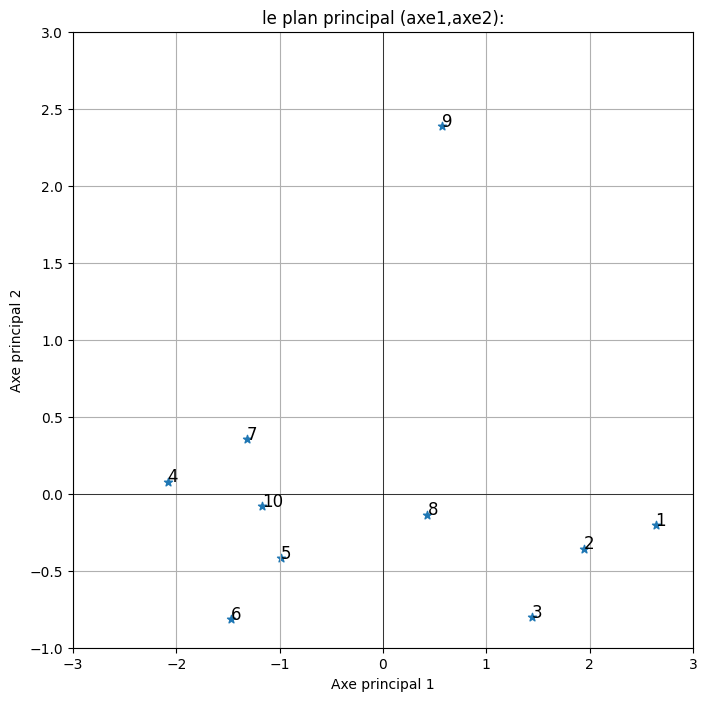

In [83]:
# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(x=coordonnees_des_individus_df.C1, y=coordonnees_des_individus_df.C2, marker='*')

# Plotting x=0 and y=0 lines
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Annotating points with their names
for i in coordonnees_des_individus_df.index:
    plt.annotate(i, (coordonnees_des_individus_df.C1[i], coordonnees_des_individus_df.C2[i]), fontsize=12)

# Setting plot limits
plt.xlim(-3, 3)
plt.ylim(-1, 3)

# Adding labels and title
plt.xlabel('Axe principal 1')
plt.ylabel('Axe principal 2')
plt.title('le plan principal (axe1,axe2):')

# Display plot
plt.grid(True)
plt.show()

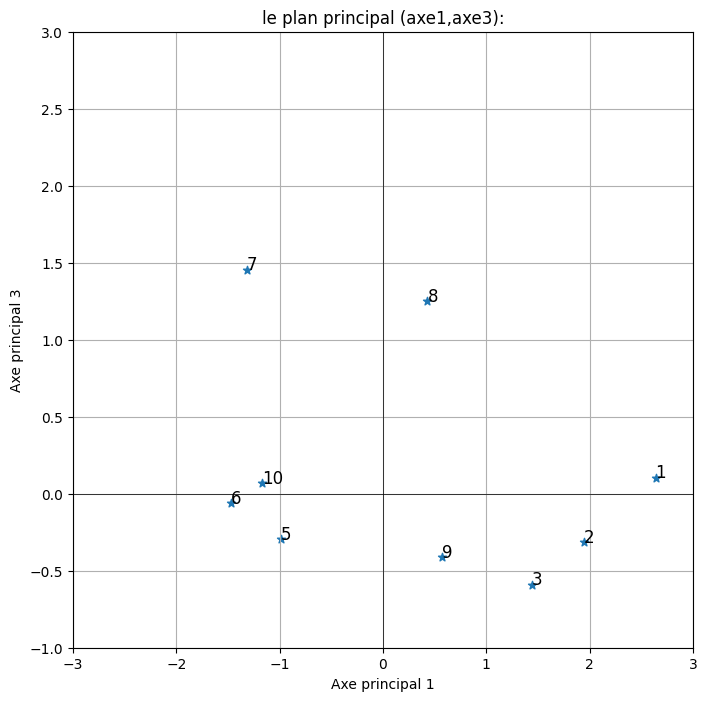

In [85]:
# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(x=coordonnees_des_individus_df.C1, y=coordonnees_des_individus_df.C3, marker='*')

# Plotting x=0 and y=0 lines
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Annotating points with their names
for i in coordonnees_des_individus_df.index:
    plt.annotate(i, (coordonnees_des_individus_df.C1[i], coordonnees_des_individus_df.C3[i]), fontsize=12)

# Setting plot limits
plt.xlim(-3, 3)
plt.ylim(-1, 3)

# Adding labels and title
plt.xlabel('Axe principal 1')
plt.ylabel('Axe principal 3')
plt.title('le plan principal (axe1,axe3):')

# Display plot
plt.grid(True)
plt.show()

/tmp/ipykernel_18882/2862211639.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (coordonnees_des_variables['C1'][i], coordonnees_des_variables['C2'][i]), fontsize=12)


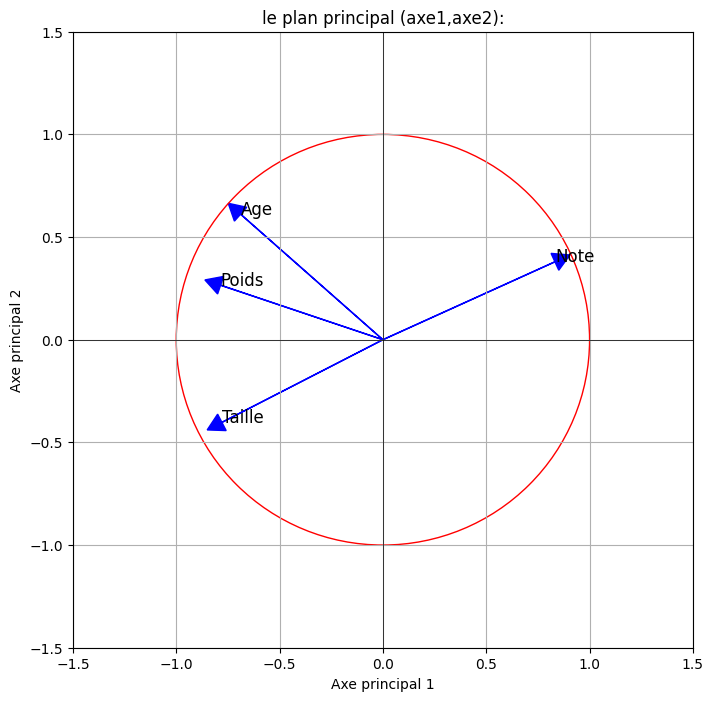

In [92]:
plt.figure(figsize=(8, 8))

# Plotting vectors from origin to points
for i, row in coordonnees_des_variables.iloc[:,[0,1]].iterrows():
    plt.arrow(0, 0, row['C1'], row['C2'], head_width=0.09, head_length=0.08, fc='blue', ec='blue')

# Annotating points with their names
for i, txt in enumerate(coordonnees_des_variables.index):
    plt.annotate(txt, (coordonnees_des_variables['C1'][i], coordonnees_des_variables['C2'][i]), fontsize=12)

# Plotting x=0 and y=0 lines
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
# Adding a circle with radius r=1
circle = plt.Circle((0, 0), 1, color='red', fill=False)
plt.gca().add_patch(circle)
# Setting plot limits
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Adding labels and title
plt.xlabel('Axe principal 1')
plt.ylabel('Axe principal 2')
plt.title('le plan principal (axe1,axe2):')


# Display plot
plt.grid(True)
plt.show()


/tmp/ipykernel_18882/450476552.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (coordonnees_des_variables['C1'][i], coordonnees_des_variables['C3'][i]), fontsize=12)


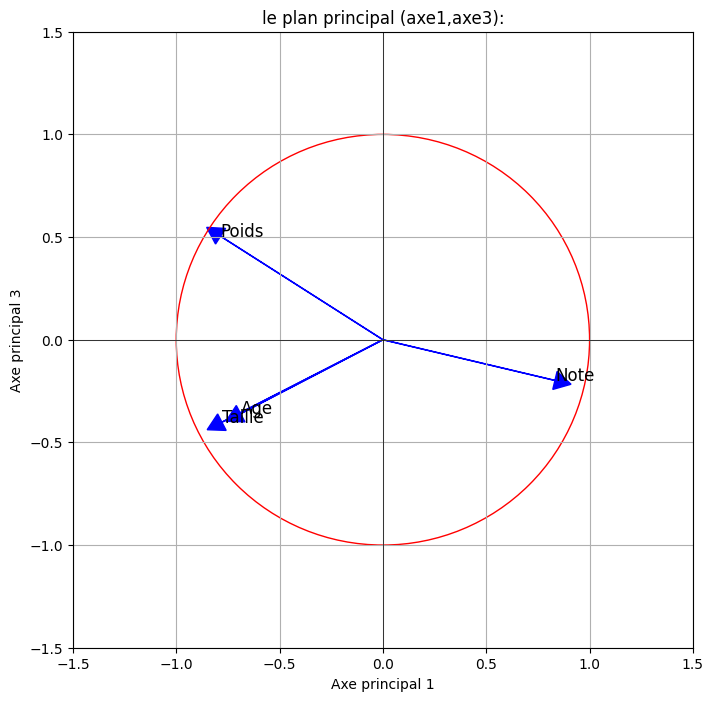

In [94]:
plt.figure(figsize=(8, 8))

# Plotting vectors from origin to points
for i, row in coordonnees_des_variables.iloc[:,[0,2]].iterrows():
    plt.arrow(0, 0, row['C1'], row['C3'], head_width=0.09, head_length=0.08, fc='blue', ec='blue')

# Annotating points with their names
for i, txt in enumerate(coordonnees_des_variables.index):
    plt.annotate(txt, (coordonnees_des_variables['C1'][i], coordonnees_des_variables['C3'][i]), fontsize=12)

# Plotting x=0 and y=0 lines
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
# Adding a circle with radius r=1
circle = plt.Circle((0, 0), 1, color='red', fill=False)
plt.gca().add_patch(circle)
# Setting plot limits
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Adding labels and title
plt.xlabel('Axe principal 1')
plt.ylabel('Axe principal 3')
plt.title('le plan principal (axe1,axe3):')


# Display plot
plt.grid(True)
plt.show()


In [87]:
Xtelda@valuer_vecteur_pro_f.values.T

array([[-0.06043738,  2.62473598, -0.14147731, -1.09127041],
       [ 0.28877024,  1.96467288,  0.33635174,  0.26524348],
       [ 0.35570451,  1.50005952,  0.89719382,  0.3574832 ],
       [ 1.01119025, -2.11912995,  0.50466629, -0.23684167],
       [ 0.06322841, -0.95249124,  0.57354259,  0.01750174],
       [-0.35455061, -1.40855106,  0.83177641, -0.58992499],
       [-1.31107808, -1.30917656, -0.80291652, -0.25261574],
       [-1.15410765,  0.49186463, -0.3040445 ,  0.74421316],
       [ 1.30049186,  0.34740324, -2.08301381,  0.20410177],
       [-0.13921154, -1.13938744,  0.18792129,  0.58210946]])